## **Análisis Exploratorio De Datos**
*Los siguientes datos serán analizados para mejorar el rendimiento de un modelo de Machine Learning implementado para segmentar\**

### Se importan la librerías que se utilizarán

In [353]:
import pandas as pd
import numpy as np
import missingno as msno
import warnings
# Ignorar todos los warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Se almancenan los datos en dataframes
### Se usará el archivo "PruebaTecnica.xlsx". Al tener dos hojas de excel, se crearán dos dataframes diferentes

In [354]:
data_clientes = pd.read_excel("PruebaTecnica.xlsx", sheet_name = "Clientes")
data_transacciones = pd.read_excel("PruebaTecnica.xlsx", sheet_name = "Transacciones")

## **Primero analizemos la tabla de clientes**
### Para esto, daremos un vistazo con el fin de tener una idea acerca de los datos que tartaremos

In [355]:
data_clientes.head()

,Id,TipoID,Ocupacion,Nacimiento,Estado,IngresosFinancieros,Activos,Pasivos,Patrimonio,NivelRiesgo,Segmento,RiesgoOcupacion
0,6,CE,Ama de Casa,1933-01-02,Activo,30000000,532130000,"2,200,000.00","529,930,000.00",Medio,Personal,4
1,10,CE,Ama de Casa,1932-06-30,Activo,0,6641000000,0.00,"6,641,000,000.00",Medio,Personal,4
2,13,CE,Ama de Casa,1930-04-20,Activo,755887000,886035000,"201,145,000.00","684,890,000.00",Bajo,Personal,4
3,30,CE,Ama de Casa,1935-11-12,Activo,18933000,431167000,0.00,"431,167,000.00",Medio,Personal,4
4,31,CE,Ama de Casa,1932-06-04,Activo,8400000,152000000,0.00,"152,000,000.00",Medio,Personal,4


In [356]:
data_clientes.tail()

,Id,TipoID,Ocupacion,Nacimiento,Estado,IngresosFinancieros,Activos,Pasivos,Patrimonio,NivelRiesgo,Segmento,RiesgoOcupacion
8495,209,CC,Rentista de Capital,1934-06-26,Activo,112522000,13960734000,"380,068,000.00","13,580,666,000.00",Medio,Personal,3
8496,7968,CC,Rentista de Capital,1986-10-15,Activo,8000000,200000000,"60,000,000.00","120,000,000.00",Medio,Personal,3
8497,7969,CC,Rentista de Capital,1987-01-19,Activo,72000000,600000000,0.00,"600,000,000.00",Medio,Personal,3
8498,7970,CC,Rentista de Capital,1987-03-13,En Espera,216000000,1896754000,"8,516,000.00","1,888,238,000.00",Medio,Personal,3
8499,8089,CC,Rentista de Capital,1992-05-08,Activo,25373000,387923000,"8,000.00","387,915,000.00",Medio,Personal,3


In [357]:
print(f"La tabla de clientes contiene {data_clientes.shape[0]} registros y {data_clientes.shape[1]} variables")

La tabla de clientes contiene 8500 registros y 12 variables


In [358]:
data_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Id                   8500 non-null   int64         
 1   TipoID               8500 non-null   object        
 2   Ocupacion            8500 non-null   object        
 3   Nacimiento           8353 non-null   datetime64[ns]
 4   Estado               8500 non-null   object        
 5   IngresosFinancieros  8500 non-null   int64         
 6   Activos              8500 non-null   int64         
 7   Pasivos              8499 non-null   float64       
 8   Patrimonio           8499 non-null   float64       
 9   NivelRiesgo          8500 non-null   object        
 10  Segmento             8500 non-null   object        
 11  RiesgoOcupacion      8500 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 797.0+ KB


### El tipo de dato de las variables parece estar correcto

### Ahora, buscaremos registros duplicados

In [359]:
duplicados = data_clientes.duplicated().sum() 
porcentaje_duplicados = (duplicados * 100) / len(data_clientes)
print(f"Hay {duplicados} registros duplicados\nEquivale al {porcentaje_duplicados}% de los datos")

Hay 17 registros duplicados
Equivale al 0.2% de los datos


### Al tener tan solo un 0.2% de registros duplicados, se procede a eliminarlos para mayor precisión

In [360]:
data_clientes.drop_duplicates(inplace = True)
cant_datos_1 = len(data_clientes)
print(f"La tabla de clientes ahora cuenta con {cant_datos_1} registros")

La tabla de clientes ahora cuenta con 8483 registros


### Buscamos el porcentaje de valores nulos

In [361]:
catn_nulos = data_clientes.isnull().sum().sum()
porcentaje_nulos = (catn_nulos * 100) / len(data_clientes)
print(f"Hay {catn_nulos} registros nulos\nEquivale al {round(porcentaje_nulos, 1)}% de los datos")

Hay 149 registros nulos
Equivale al 1.8% de los datos


In [362]:
nulos = pd.concat([data_clientes.isnull().sum(), 100 * data_clientes.isnull().mean()], axis = 1)
nulos.columns = ["cantidad", "%"]
nulos.sort_values(by = "%", ascending = False)

,cantidad,%
Nacimiento,147,1.73
Pasivos,1,0.01
Patrimonio,1,0.01
Id,0,0.00
TipoID,0,0.00
Ocupacion,0,0.00
Estado,0,0.00
IngresosFinancieros,0,0.00
Activos,0,0.00
NivelRiesgo,0,0.00


### La variable con más datos nulos es "Nacimiento"

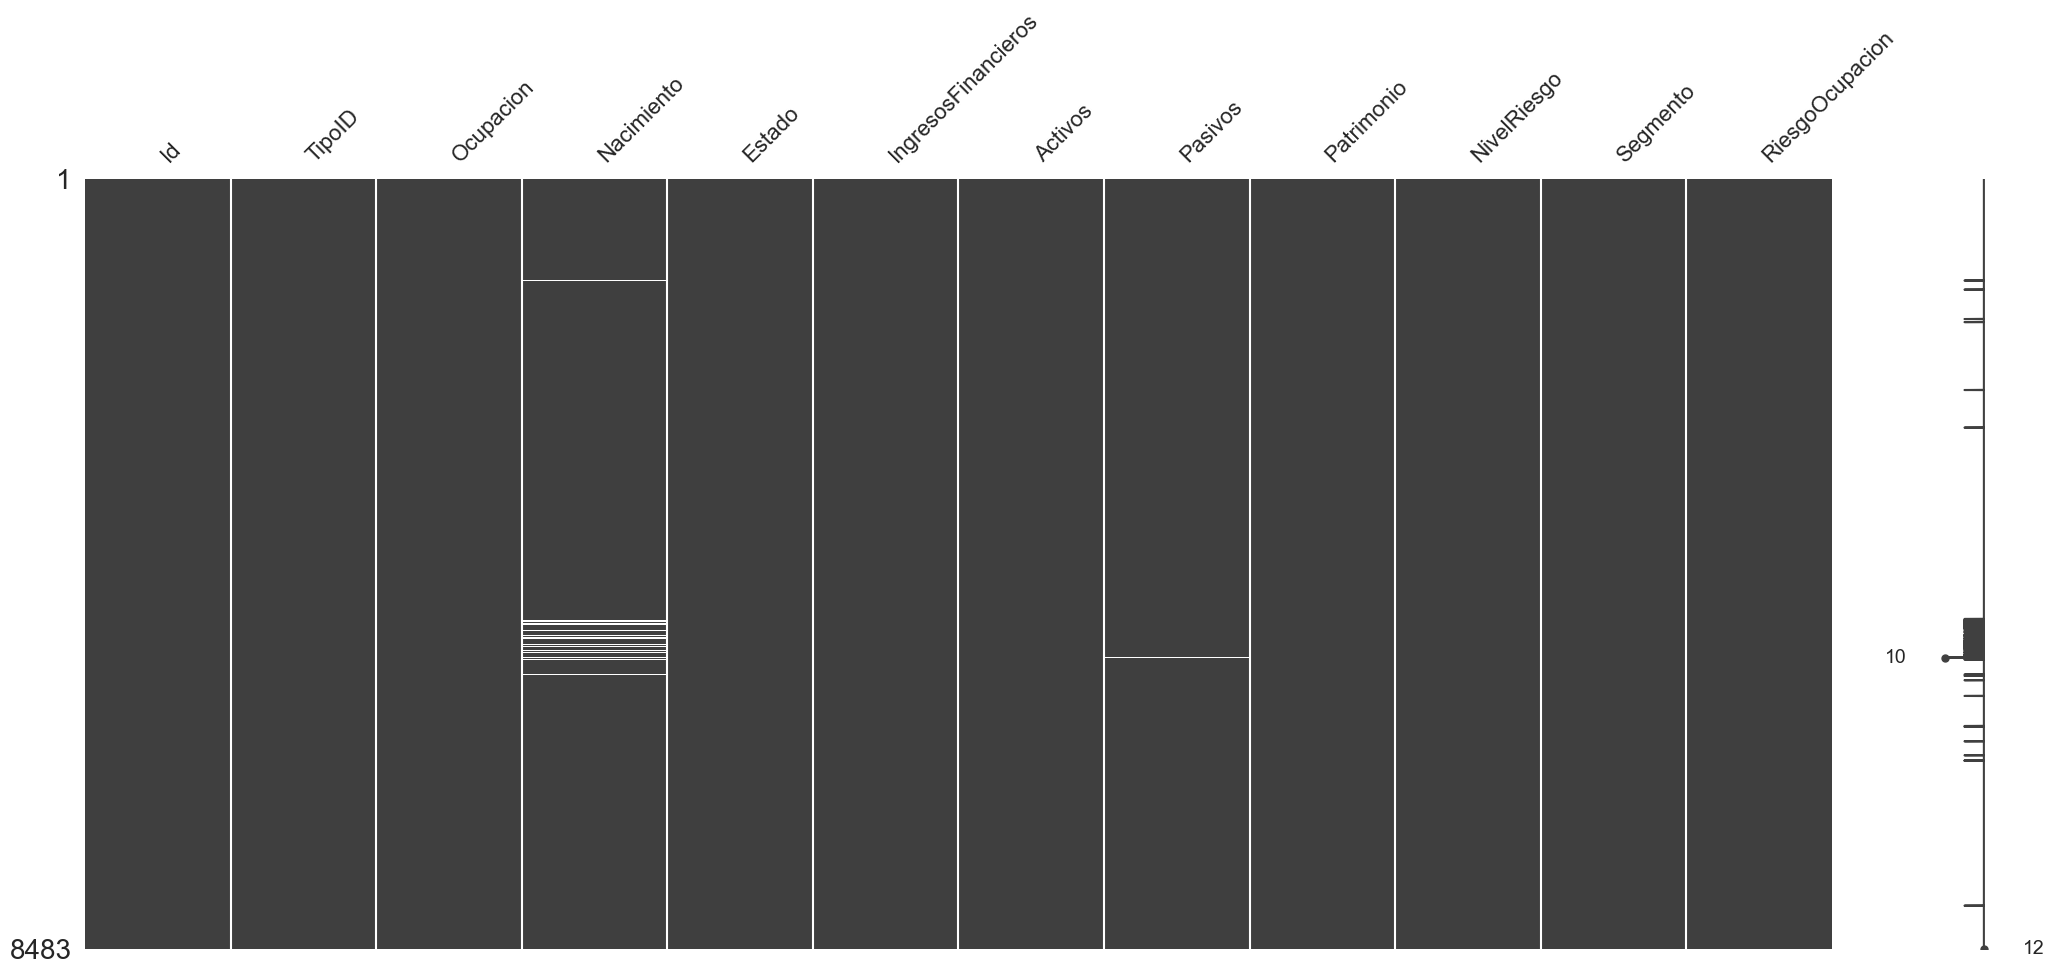

In [363]:
msno.matrix(data_clientes)
plt.show()

### Con esta información podemos concluir que los valores nulos no representan una gran cantidad de datos en la tabla, por lo que se procede a eliminarlos

In [364]:
data_clientes.dropna(inplace = True)
cant_datos_2 = len(data_clientes)
print(f"La tabla de clientes ahora cuenta con {cant_datos_2} registros")

La tabla de clientes ahora cuenta con 8335 registros


### Confirmamos que no haya ningún ID repetido

In [365]:
cant_id = data_clientes["Id"].value_counts().max()
print(f"La mayor cantidad de veces que se repite un ID es: {cant_id}")

La mayor cantidad de veces que se repite un ID es: 1


## **Primero analizaremos las variables categóricas**

## Tipo de identificación

### Veamos la cantidad de registros por tipo de identificación

In [366]:
TipoID_df = pd.DataFrame(data_clientes["TipoID"].value_counts()).reset_index()
TipoID_df.columns = ["TipoID", "Cantidad_Registros"]
TipoID_df

,TipoID,Cantidad_Registros
0,CC,7957
1,TI,150
2,RC,103
3,CE,98
4,PP,24
5,OT,3


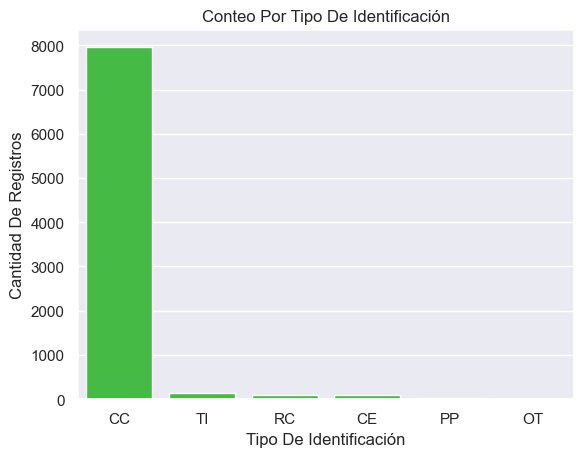

In [367]:
sns.barplot(x = "TipoID", y = "Cantidad_Registros", data = TipoID_df, color = "limegreen")
plt.xlabel("Tipo De Identificación")
plt.ylabel("Cantidad De Registros")
plt.title("Conteo Por Tipo De Identificación")
plt.show()

### La mayor cantidad de los clientes tienen cédula de ciudadanía

### Descripción del tipo de identificación:

- CC: Cédula 
- TI: Tarjeta de Identidad 
- RC: Registro Civil 
- CE: Cédula de Extranjería 
- PP: Pasaporte 
- OT: Orden de Trabajo 

*Deberá corroborarse esta información con el proveedor de los datos\**

## Tipo de ocupación

### Veamos la cantidad de registros por ocupación

In [368]:
Ocupacion_df = pd.DataFrame(data_clientes["Ocupacion"].value_counts()).reset_index()
Ocupacion_df.columns = ["Ocupacion", "Cantidad_Registros"]
Ocupacion_df

,Ocupacion,Cantidad_Registros
0,Empleado,2941
1,Rentista de Capital,2062
2,Independiente,1238
3,Pensionado,932
4,Otro,518
5,Estudiante,413
6,Ama de Casa,231


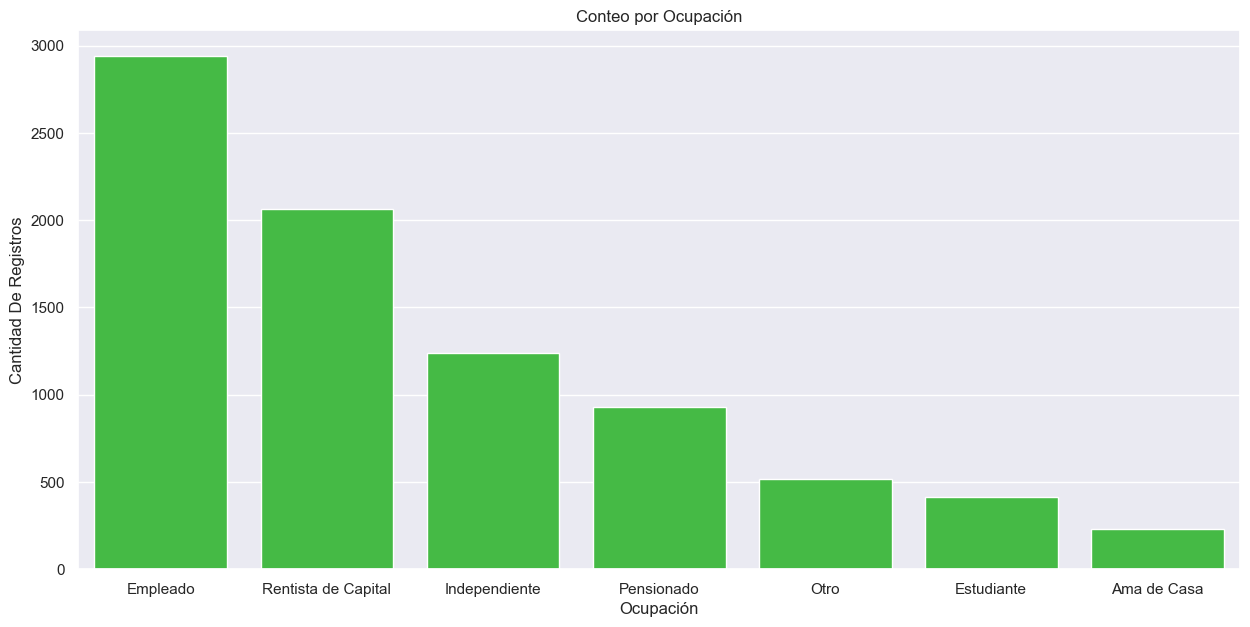

In [369]:
plt.figure(figsize = (15, 7))
sns.barplot(x = "Ocupacion", y = "Cantidad_Registros", data = Ocupacion_df, color = "limegreen")
plt.xlabel("Ocupación")
plt.ylabel("Cantidad De Registros")
plt.title("Conteo por Ocupación")
plt.show()

### Se puede evidenciar que la mayoría de los clientes son empleados, esto es un buen dato dependiendo del contexto

## Fecha de Nacimiento

### Primero agregaremos una columna representando la edad y además clasificaremos a los clientes en un rango etario

*La edad se calculará restando la fecha de nacimiento a la fecha en la que se realiza este análisis (2023/07/17)\**

In [370]:
fecha_actual = pd.to_datetime("today")
data_clientes["Edad"] = (fecha_actual - data_clientes["Nacimiento"]).astype("<m8[Y]").astype(int)
# Definir los rangos etarios
rangos_etarios = [0, 18, 30, 50, float('inf')]
etiquetas_etarias = ["Menor de 18", "18-30", "31-50", "Mayor de 50"]
# Crear una columna "Rango Etario" utilizando pd.cut()
data_clientes["RangoEtario"] = pd.cut(data_clientes["Edad"], bins = rangos_etarios, labels = etiquetas_etarias, right = False)
columnas = data_clientes.columns.tolist()
col_rango_etario = columnas.pop(columnas.index("RangoEtario"))
col_edad = columnas.pop(columnas.index("Edad"))
columnas.insert((columnas.index("Nacimiento") + 1), col_rango_etario)
columnas.insert((columnas.index("Nacimiento") + 1), col_edad)
data_clientes = data_clientes[columnas]
data_clientes.head()

,Id,TipoID,Ocupacion,Nacimiento,Edad,RangoEtario,Estado,IngresosFinancieros,Activos,Pasivos,Patrimonio,NivelRiesgo,Segmento,RiesgoOcupacion
0,6,CE,Ama de Casa,1933-01-02,90,Mayor de 50,Activo,30000000,532130000,"2,200,000.00","529,930,000.00",Medio,Personal,4
1,10,CE,Ama de Casa,1932-06-30,91,Mayor de 50,Activo,0,6641000000,0.00,"6,641,000,000.00",Medio,Personal,4
2,13,CE,Ama de Casa,1930-04-20,93,Mayor de 50,Activo,755887000,886035000,"201,145,000.00","684,890,000.00",Bajo,Personal,4
3,30,CE,Ama de Casa,1935-11-12,87,Mayor de 50,Activo,18933000,431167000,0.00,"431,167,000.00",Medio,Personal,4
4,31,CE,Ama de Casa,1932-06-04,91,Mayor de 50,Activo,8400000,152000000,0.00,"152,000,000.00",Medio,Personal,4


### Veamos el rango de edad de nuestros clientes

In [371]:
edad_min = (data_clientes["Edad"].min())
edad_max = (data_clientes["Edad"].max())
print(f"El rango de edad de los clientes va desde {edad_min} hasta {edad_max} años")

El rango de edad de los clientes va desde -59 hasta 123 años


### Este rango causa algunas inquietudes, se analizará en un boxplot

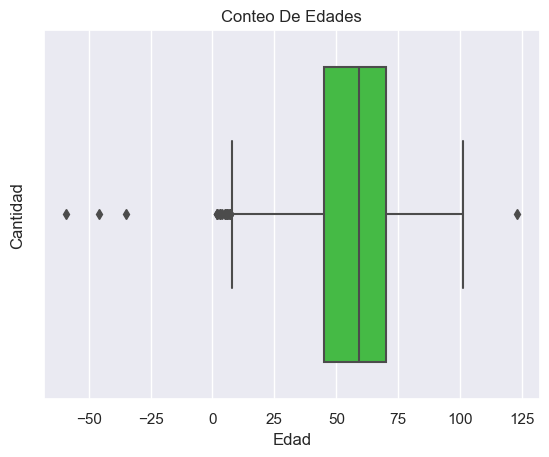

In [372]:
sns.boxplot(x = data_clientes["Edad"], color = "limegreen")
plt.xlabel("Edad")
plt.ylabel("Cantidad")
plt.title("Conteo De Edades")
plt.show()

### En el gráfico anterior se pueden evidenciar algunos valores atípicos, vamos a verlos

In [373]:
edades_min = data_clientes[data_clientes["Nacimiento"] > fecha_actual]
edades_min

,Id,TipoID,Ocupacion,Nacimiento,Edad,RangoEtario,Estado,IngresosFinancieros,Activos,Pasivos,Patrimonio,NivelRiesgo,Segmento,RiesgoOcupacion
252,115,CE,Empleado,2069-06-21,-46,NaN,Activo,1063036000,3581828000,"82,000.00","3,581,828,000.00",Medio,Personal,2
600,1178,CC,Empleado,2057-10-06,-35,NaN,Activo,165640000,1941639000,0.00,"1,941,639,000.00",Medio,Personal,2
984,2821,CC,Empleado,2082-07-09,-59,NaN,Activo,85758000,6730625000,"11,648,000.00","6,718,977,000.00",Medio,Personal,2


### No es posible que una persona haya nacido después de la fecha que se hace este análisis, y por ende, tenga una edad negativa

### Además, desde la muerte de la francesa Lucile Randon a los 118 años el 17 de enero de 2023, el título a la persona viva más anciana del mundo es de la española María Branyas Morera, con una edad de 116 años

In [374]:
edad_Lucile = 118
edades_max = data_clientes[data_clientes["Edad"] > edad_Lucile]
edades_max

,Id,TipoID,Ocupacion,Nacimiento,Edad,RangoEtario,Estado,IngresosFinancieros,Activos,Pasivos,Patrimonio,NivelRiesgo,Segmento,RiesgoOcupacion
5171,5513,CC,Otro,1900-01-01,123,Mayor de 50,En Espera,120000000,1759897000,"759,000,000.00","1,000,897,000.00",Medio,Personal,4


### Podemos concluir que no puede haber una persona con más de 118 años. Se deberá verificar si hubo un error al momento de digitar la edad de estos clientes, sin embargo, sus registros no se tendrán en cuenta en este análisis

In [375]:
Id_eliminar = edades_min["Id"].tolist() + edades_max["Id"].tolist()
data_clientes = data_clientes.drop(data_clientes[data_clientes["Id"].isin(Id_eliminar)].index)
print(f"Ahora la tabla de clientes cuenta con {data_clientes.shape[0]} registros")

Ahora la tabla de clientes cuenta con 8331 registros


### Observemos el nuevo rango de edad de nuestros clientes

In [376]:
fecha_min_nuevo = data_clientes["Edad"].min()
fecha_max_nuevo = data_clientes["Edad"].max()
print(f"El nuevo rango de edades de los clientes va desde {fecha_min_nuevo} hasta {fecha_max_nuevo} años")

El nuevo rango de edades de los clientes va desde 2 hasta 101 años


### ¿Es posible tener un cliente con 2 años de edad?. Analizemos la información de los clientes menores de 18

In [377]:
menores_18 = data_clientes[data_clientes["RangoEtario"] == "Menor de 18"]
menores_18.head()

,Id,TipoID,Ocupacion,Nacimiento,Edad,RangoEtario,Estado,IngresosFinancieros,Activos,Pasivos,Patrimonio,NivelRiesgo,Segmento,RiesgoOcupacion
248,108,CE,Empleado,2010-04-12,13,Menor de 18,Activo,116128000,507972000,"24,036,000.00","483,936,000.00",Medio,Personal,2
3029,7884,TI,Empleado,2012-02-03,11,Menor de 18,Activo,0,30000000,0.00,"30,000,000.00",Medio,Personal,2
3074,8090,RC,Empleado,2006-12-27,16,Menor de 18,En Espera,0,5000000,0.00,"5,000,000.00",Medio,Personal,2
3228,7381,TI,Estudiante,2010-01-13,13,Menor de 18,Activo,4800000,77969000,"6,500,000.00","71,469,000.00",Medio,Personal,4
3235,7395,TI,Estudiante,2011-07-06,12,Menor de 18,Activo,228546000,813520000,0.00,"813,520,000.00",Medio,Personal,4


### Veamos la ocupación de los menores de edad

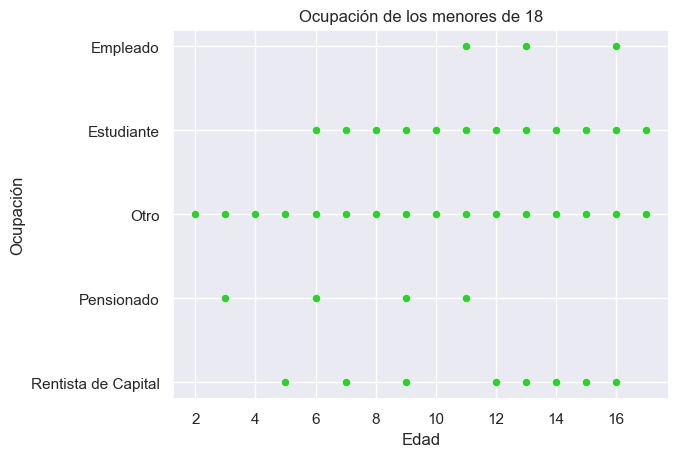

In [378]:
sns.scatterplot(data = menores_18, x = "Edad", y = "Ocupacion", color = "limegreen")
plt.xlabel("Edad")
plt.ylabel("Ocupación")
plt.title("Ocupación de los menores de 18")
plt.show()

### De aquí podemos sacar varias conclusiones sobre los menores basándonos en la legislación colombiana:
- La edad mínima para trabajar es de 15 años (con algunas restricciones y requerimientos)
- No puede trabajar con una orden de trabajo
- No puede tener cédula 
- No puede ser pensionado, rentista de capital ni ama de casa  (en el gráfico vemos que no hay ningún registro con ocupación ama de casa)

### Se eliminarán los registros que no cumplan estas características

In [379]:
tipoID_menores_invalido = ["CC", "CE", "OT"]
ocupacion_menor_invalida = ["Rentista de Capital", "Pensionado"]
data_clientes = data_clientes[data_clientes["Edad"] >= 15] 
data_clientes = data_clientes.drop(data_clientes.loc[(data_clientes["Edad"] < 18) & (data_clientes["TipoID"].isin(tipoID_menores_invalido))].index)
data_clientes = data_clientes.drop(data_clientes.loc[(data_clientes["Edad"] < 18) & (data_clientes["Ocupacion"].isin(ocupacion_menor_invalida))].index)
print(f"La tabla de clientes ahora cuenta con {data_clientes.shape[0]} registros")

La tabla de clientes ahora cuenta con 8207 registros


### Por último analizemos el rango etario de los clientes

In [380]:
RangoEtario_df = pd.DataFrame(data_clientes["RangoEtario"].value_counts()).reset_index()
RangoEtario_df.columns = ["RangoEtario", "Cantidad_Registros"]
RangoEtario_df

,RangoEtario,Cantidad_Registros
0,Mayor de 50,5577
1,31-50,2160
2,18-30,430
3,Menor de 18,40


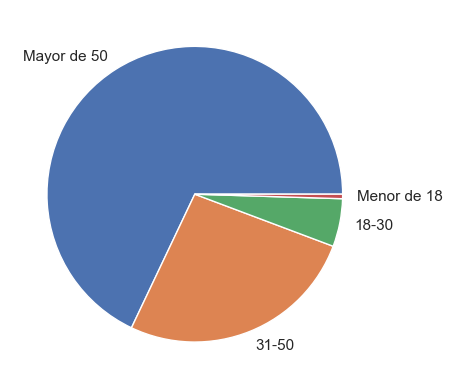

In [381]:
plt.pie(data = RangoEtario_df, x = "Cantidad_Registros", labels = "RangoEtario")
plt.show()

### La mayoría de los clientes son mayores de 50 años. Ahora que tenemos registros más confiables de los clientes, pasemos a analizar su estado

In [382]:
df_estado = pd.DataFrame(data_clientes["Estado"].value_counts()).reset_index()
df_estado.columns = ["Estado", "Cantidad_Registros"]
df_estado

,Estado,Cantidad_Registros
0,Activo,6792
1,En Espera,982
2,Inactivo,313
3,Prospecto,120


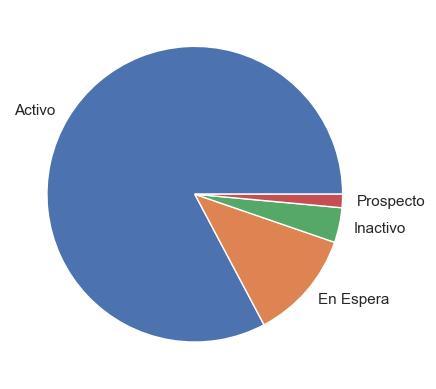

In [383]:
plt.pie(data =  df_estado, x = "Cantidad_Registros", labels = "Estado")
plt.show()

### Es bueno tener a la mayoría de clientes activos, y más en espera que inactivos. Ahora analizemos el nivel de riesgo de los clientes

In [384]:
df_riesgo = pd.DataFrame(data_clientes["NivelRiesgo"].value_counts()).reset_index()
df_riesgo.columns = ["NivelRiesgo", "Cantidad_Registros"]
df_riesgo

,NivelRiesgo,Cantidad_Registros
0,Medio,6072
1,Bajo,2039
2,Alto,96


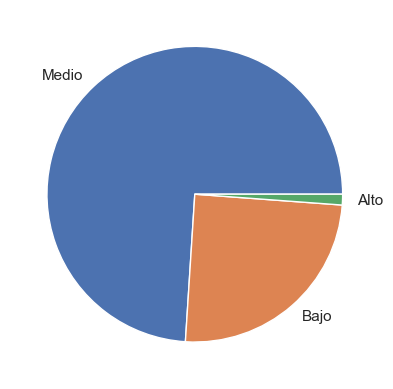

In [385]:
plt.pie(data =  df_riesgo, x = "Cantidad_Registros", labels = "NivelRiesgo")
plt.show()

### El nivel de riesgo de un cliente se refiere a la evaluación de la probabilidad de que el cliente incumpla con sus obligaciones financieras o represente un riesgo para una empresa o institución. 
### Aunque el nivel de riesgo medio es aceptable y manejable, es favorable que las estrategias de marketing apunten a conseguir más clientes con el nivel de riesgo bajo. 
### Ahora analizemos la variable Segmento

In [386]:
df_segmento = pd.DataFrame(data_clientes["Segmento"].value_counts()).reset_index()
df_segmento.columns = ["Segmento", "Cantidad_Registros"]
df_segmento

,Segmento,Cantidad_Registros
0,Personal,8196
1,Corporativo,11


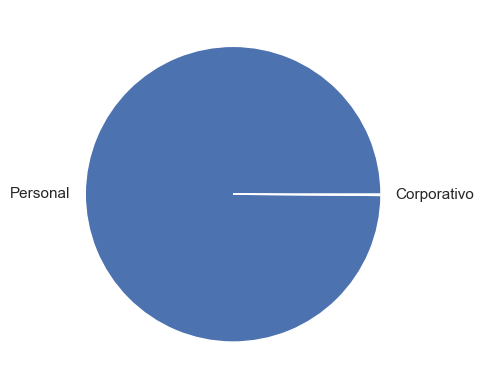

In [387]:
plt.pie(data =  df_segmento, x = "Cantidad_Registros", labels = "Segmento")
plt.show()

### La variable segmento clasifica a los clientes según su naturaleza y características
- Segmento personal: Este segmento se refiere a los individuos o consumidores finales que utilizan productos y servicios financieros para satisfacer sus necesidades personales.

- Segmento corporativo: Este segmento se refiere a las empresas y organizaciones que requieren servicios financieros para satisfacer sus necesidades comerciales.

### La mayoría de los clientes son personas físicas

### Para finalizar con las variables categóricas, analizemos el riesgo de ocupación 

In [388]:
df_riesgo_ocupacion = pd.DataFrame(data_clientes["RiesgoOcupacion"].value_counts()).reset_index()
df_riesgo_ocupacion.columns = ["RiesgoOcupacion", "Cantidad_Registros"]
df_riesgo_ocupacion

,RiesgoOcupacion,Cantidad_Registros
0,2,3864
1,3,2052
2,5,1238
3,4,1053


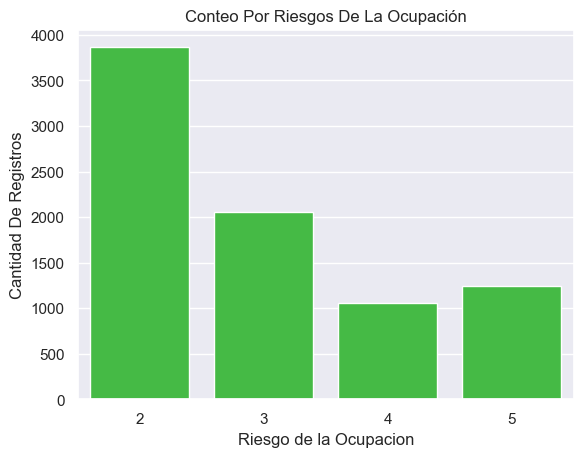

In [389]:
sns.barplot(x = "RiesgoOcupacion", y = "Cantidad_Registros", data = df_riesgo_ocupacion, color = "limegreen")
plt.xlabel("Riesgo de la Ocupacion")
plt.ylabel("Cantidad De Registros")
plt.title("Conteo Por Riesgos De La Ocupación")
plt.show()

### El riesgo de ocupación de un cliente se refiere a la evaluación del riesgo asociado a la ocupación o empleo del cliente, se evalúa considerando varios factores como:
- Estabilidad laboral
- Industria y sector laboral 
- Ingresos y capacidad de pago
- Tendencias y perspectivas del mercado laboral

### Un nivel de riesgo de ocupación menor asegura que el cliente tiene mayores posiblidades de cumplir con sus obligaciones

## **Ahora analizaremos las variables numéricas**

### Primero haremos un resumen estadístico de estas variables


In [390]:
num_vars = ["IngresosFinancieros", "Activos", "Pasivos", "Patrimonio"]
stats = data_clientes[num_vars].describe().round(2)
pd.set_option('display.float_format', '{:,.2f}'.format)
stats.T

,count,mean,std,min,25%,50%,75%,max
IngresosFinancieros,"8,207.00","519,337,208.96","10,805,654,165.20",0.00,"35,592,500.00","98,495,000.00","240,000,000.00","843,482,000,000.00"
Activos,"8,207.00","2,763,854,653.72","24,263,946,960.05",0.00,"358,932,500.00","899,409,000.00","2,061,661,500.00","1,163,656,697,000.00"
Pasivos,"8,207.00","108,925,958,288.82","9,835,473,080,296.93","-4,500,000.00",0.00,"20,666,000.00","159,140,500.00","891,020,085,353,000.00"
Patrimonio,"8,207.00","2,393,982,117.54","19,119,519,975.42","-1,088,000,000.00","300,042,500.00","766,471,000.00","1,800,932,500.00","1,062,099,797,000.00"


### Veamos una matriz de correalación

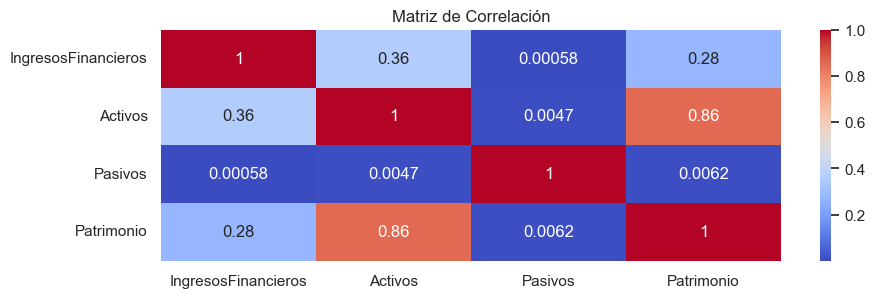

In [391]:
plt.figure(figsize = (10, 3))
correlation_matrix = data_clientes[num_vars].corr()
sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm")
plt.title("Matriz de Correlación")
plt.show()

### Se puede notar una alta correlación entre el patrimonio y los activos, esto se debe a que el patrinomio se calcula de la siguiente manera: 
- Patrimonio = Activos - Pasivos 

### Al ser una columna calculada con otras dos columnas de la tabla, no se tendrá en cuenta en el modelo de segmentación de clientes

### Analizemos más a fondo cada variable

## Ingresos Financieros

In [392]:
ingfin_min = data_clientes["IngresosFinancieros"].min()
ingfin_max = data_clientes["IngresosFinancieros"].max()
print(f"El rango de ingresos financieros va desde {ingfin_min} hasta {ingfin_max}")

El rango de ingresos financieros va desde 0 hasta 843482000000


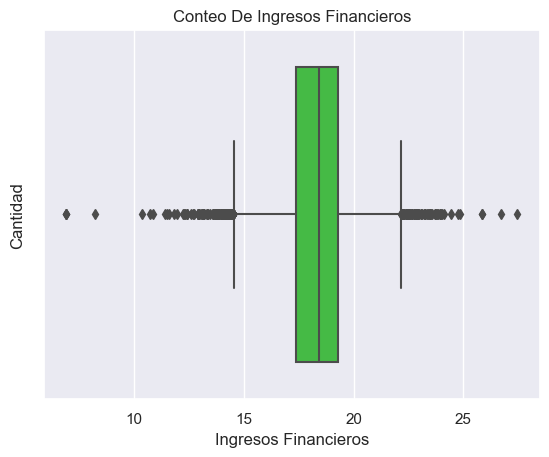

In [393]:
# Al ser valores tan grandes, normalizemos para una mejor visualización
# Se usará una transformación logarítmica
ingresos_escalados = np.log(data_clientes["IngresosFinancieros"])
sns.boxplot(x = ingresos_escalados, color = "limegreen")
plt.xlabel("Ingresos Financieros")
plt.ylabel("Cantidad")
plt.title("Conteo De Ingresos Financieros")
plt.show()

### Podemos ver que tenemos datos sesgados, sigamos analizando

In [394]:
df_ingreso_financiero = pd.DataFrame(data_clientes["IngresosFinancieros"])
df_ingreso_financiero.sort_values(by = "IngresosFinancieros",ascending = False).head(10)

,IngresosFinancieros
7676,843482000000
6837,412031772000
2280,171728060000
3846,170163430000
270,62714052000
6981,56907808000
6780,41038680000
8170,30049596000
1329,26778772000
2676,26245000000


### Podemos notar que el cliente con el cuarto ingreso financiero más alto casi triplica el monto del quinto ingreso financiero más alto

### Analizemos a estos clientes en específico

In [395]:
mayores_ingfin = df_ingreso_financiero["IngresosFinancieros"].nlargest(4).tolist()
data_clientes[data_clientes["IngresosFinancieros"].isin(mayores_ingfin)]

,Id,TipoID,Ocupacion,Nacimiento,Edad,RangoEtario,Estado,IngresosFinancieros,Activos,Pasivos,Patrimonio,NivelRiesgo,Segmento,RiesgoOcupacion
2280,6348,CC,Empleado,1968-08-16,54,Mayor de 50,Activo,171728060000,8737196000,"34,952,000.00","8,702,244,000.00",Medio,Personal,2
3846,1585,CC,Independiente,1951-10-13,71,Mayor de 50,Activo,170163430000,1072668840000,"542,695,340,000.00","529,973,500,000.00",Medio,Personal,5
6837,1764,CC,Rentista de Capital,1955-08-29,67,Mayor de 50,Activo,412031772000,1163656697000,"501,507,840,000.00","662,148,857,000.00",Medio,Personal,3
7676,4110,CC,Rentista de Capital,1957-05-19,66,Mayor de 50,Activo,843482000000,7879418000,0.00,"7,879,418,000.00",Medio,Personal,3


### 2 de los 4 clientes son rentistas de capital, además todos son mayores de 50 años. Se mantendrán los registros ya que no parecen erróneos, sin embargo no estaría damás rectificar esta información

In [396]:
df_ingreso_financiero.sort_values(by = "IngresosFinancieros").head(10)

,IngresosFinancieros
5351,0
161,0
3498,0
5464,0
5163,0
3211,0
5152,0
3502,0
3208,0
7297,0


### Aquí notamos que hay varios clientes que no tienen ningún ingreso financiero, analizemos a estos clientes

In [397]:
sin_ingresos = data_clientes[data_clientes["IngresosFinancieros"] == 0]
print(f"Hay {sin_ingresos.shape[0]} clientes sin ingresos financieros")

Hay 77 clientes sin ingresos financieros


In [398]:
sin_ingresos.head()

,Id,TipoID,Ocupacion,Nacimiento,Edad,RangoEtario,Estado,IngresosFinancieros,Activos,Pasivos,Patrimonio,NivelRiesgo,Segmento,RiesgoOcupacion
1,10,CE,Ama de Casa,1932-06-30,91,Mayor de 50,Activo,0,6641000000,0.00,"6,641,000,000.00",Medio,Personal,4
37,2279,CC,Ama de Casa,1948-05-29,75,Mayor de 50,Activo,0,25000000,0.00,"25,000,000.00",Medio,Personal,4
51,2438,CC,Ama de Casa,1942-03-23,81,Mayor de 50,Activo,0,0,0.00,0.00,Medio,Personal,4
127,3641,CC,Ama de Casa,1971-02-05,52,Mayor de 50,Prospecto,0,100000000,0.00,"100,000,000.00",Medio,Personal,4
133,3706,CC,Ama de Casa,1944-03-06,79,Mayor de 50,Activo,0,38000000,0.00,"38,000,000.00",Medio,Personal,4


### Veamos la ocupación y el rango etario de los clientes sin ingresos

In [399]:
Ocupacion_sining_df = pd.DataFrame(sin_ingresos["Ocupacion"].value_counts()).reset_index()
Ocupacion_sining_df.columns = ["Ocupacion", "Cantidad_Registros"]
Ocupacion_sining_df

,Ocupacion,Cantidad_Registros
0,Estudiante,27
1,Otro,24
2,Ama de Casa,9
3,Rentista de Capital,8
4,Empleado,6
5,Independiente,3


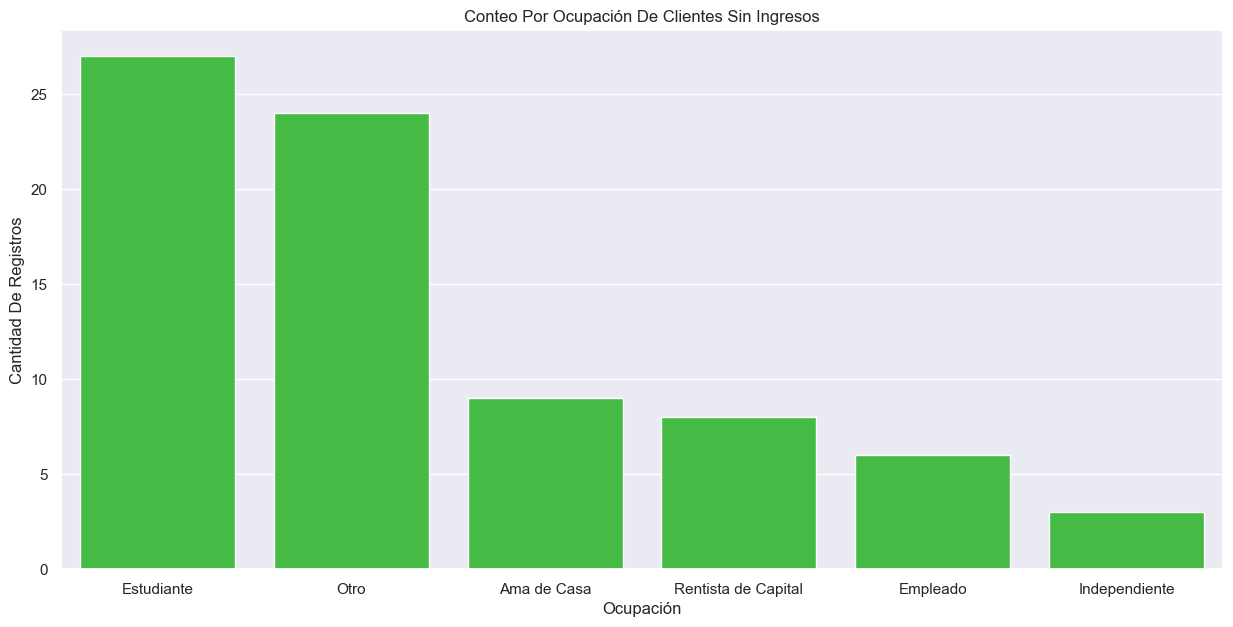

In [400]:
plt.figure(figsize = (15, 7))
sns.barplot(x = "Ocupacion", y = "Cantidad_Registros", data = Ocupacion_sining_df, color = "limegreen")
plt.xlabel("Ocupación")
plt.ylabel("Cantidad De Registros")
plt.title("Conteo Por Ocupación De Clientes Sin Ingresos")
plt.show()

In [401]:
rangoeta_sining_df = pd.DataFrame(sin_ingresos["RangoEtario"].value_counts()).reset_index()
rangoeta_sining_df.columns = ["RangoEtario", "Cantidad_Registros"]
rangoeta_sining_df

,RangoEtario,Cantidad_Registros
0,18-30,26
1,Mayor de 50,24
2,31-50,16
3,Menor de 18,11


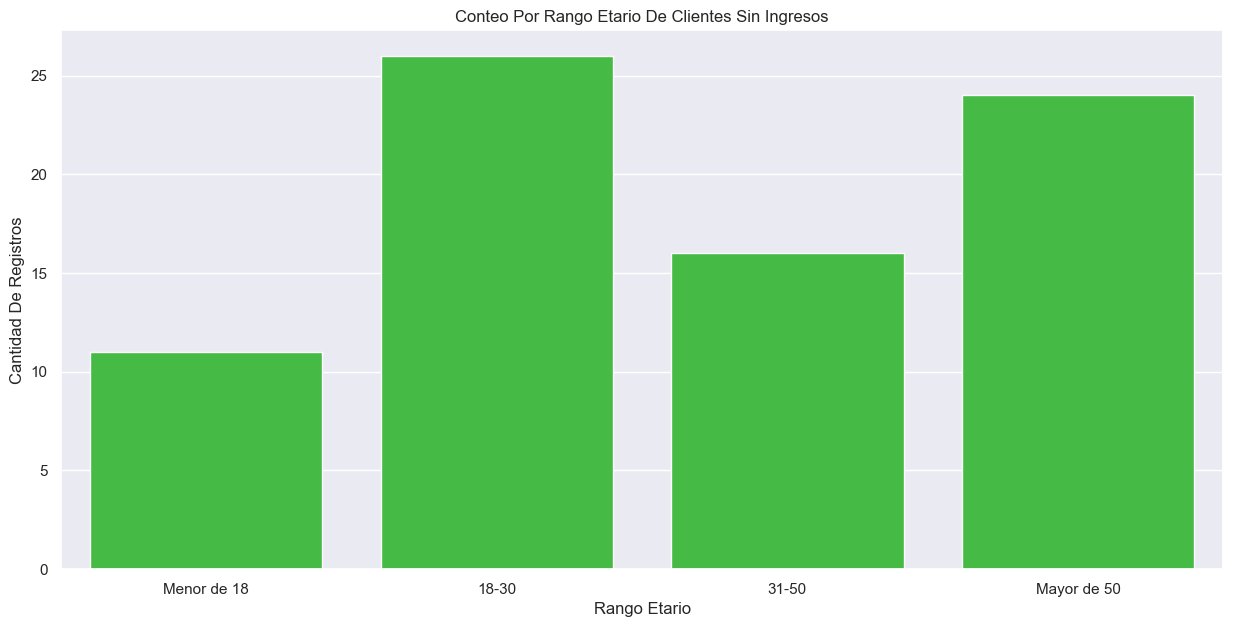

In [402]:
plt.figure(figsize = (15, 7))
sns.barplot(x = "RangoEtario", y = "Cantidad_Registros", data = rangoeta_sining_df, color = "limegreen")
plt.xlabel("Rango Etario")
plt.ylabel("Cantidad De Registros")
plt.title("Conteo Por Rango Etario De Clientes Sin Ingresos")
plt.show()

### La mayoría de clientes sin ingresos son estudiantes o tienen otra ocupación, además están en el rango de los 18 a 30 y mayores de 50 años

### Entonces, de los clientes con ingresos financieros, ¿Cuanto es lo mínimo que ganan?

In [403]:
min_ing = df_ingreso_financiero[df_ingreso_financiero["IngresosFinancieros"] != 0]
print(f"El cliente con el menor ingreso financiero gana: {min_ing.values.min()}")

El cliente con el menor ingreso financiero gana: 1000


### Basado en esta información, concluyo que la moneda usada en los datos es el dólar
*Se deberá corroborar esta información con el proveedor de los datos\**

### Pasemos a analizar los activos

In [404]:
activos_min = data_clientes["Activos"].min()
activos_max = data_clientes["Activos"].max()
print(f"El rango de activos va desde {activos_min} hasta {activos_max}")

El rango de activos va desde 0 hasta 1163656697000


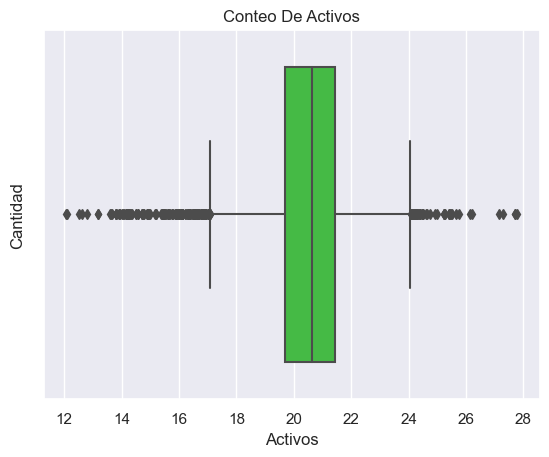

In [405]:
# Al ser valores tan grandes, normalizemos para una mejor visualización
# Se usará una transformación logarítmica
activos_escalados = np.log(data_clientes["Activos"])
sns.boxplot(x = activos_escalados, color = "limegreen")
plt.xlabel("Activos")
plt.ylabel("Cantidad")
plt.title("Conteo De Activos")
plt.show()

### Al igual que con los ingresos, los datos están sesgados, analizemos

In [406]:
df_activos = pd.DataFrame(data_clientes["Activos"])
df_activos.sort_values(by = "Activos",ascending = False).head(10)

,Activos
6837,1163656697000
3846,1072668840000
270,1062099797000
681,700000000000
6674,608629000000
6780,237895276000
7872,224822925000
561,154658496000
3925,140331000000
7768,119727665000


### Los activos están un poco más parejos, procedamos igual con las personas sin activos

In [407]:
sin_activos = data_clientes[data_clientes["Activos"] == 0]
print(f"Hay {sin_activos.shape[0]} clientes sin activos")

Hay 73 clientes sin activos


In [408]:
sin_activos.head()

,Id,TipoID,Ocupacion,Nacimiento,Edad,RangoEtario,Estado,IngresosFinancieros,Activos,Pasivos,Patrimonio,NivelRiesgo,Segmento,RiesgoOcupacion
51,2438,CC,Ama de Casa,1942-03-23,81,Mayor de 50,Activo,0,0,0.00,0.00,Medio,Personal,4
216,5311,CC,Ama de Casa,1984-12-03,38,31-50,Activo,18000000,0,0.00,0.00,Medio,Personal,4
421,754,CC,Empleado,1957-09-05,65,Mayor de 50,En Espera,44004000,0,0.00,0.00,Medio,Personal,2
839,2055,CC,Empleado,1935-06-28,88,Mayor de 50,En Espera,7200000,0,0.00,0.00,Medio,Personal,2
864,2322,CC,Empleado,1971-04-15,52,Mayor de 50,Activo,13200000,0,0.00,0.00,Medio,Personal,2


### Ocupación y rango etario

In [409]:
Ocupacion_sinact_df = pd.DataFrame(sin_activos["Ocupacion"].value_counts()).reset_index()
Ocupacion_sinact_df.columns = ["Ocupacion", "Cantidad_Registros"]
Ocupacion_sinact_df

,Ocupacion,Cantidad_Registros
0,Otro,31
1,Empleado,21
2,Estudiante,9
3,Independiente,5
4,Rentista de Capital,3
5,Ama de Casa,2
6,Pensionado,2


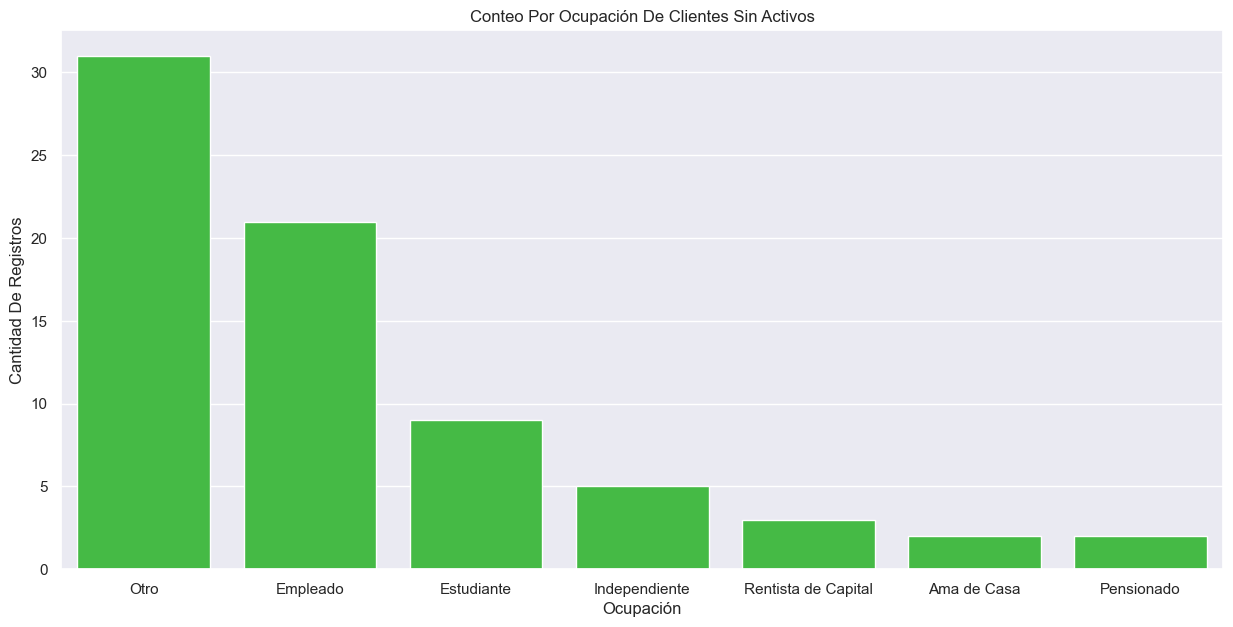

In [410]:
plt.figure(figsize = (15, 7))
sns.barplot(x = "Ocupacion", y = "Cantidad_Registros", data = Ocupacion_sinact_df, color = "limegreen")
plt.xlabel("Ocupación")
plt.ylabel("Cantidad De Registros")
plt.title("Conteo Por Ocupación De Clientes Sin Activos")
plt.show()

In [411]:
rangoeta_sinact_df = pd.DataFrame(sin_activos["RangoEtario"].value_counts()).reset_index()
rangoeta_sinact_df.columns = ["RangoEtario", "Cantidad_Registros"]
rangoeta_sinact_df

,RangoEtario,Cantidad_Registros
0,Mayor de 50,36
1,31-50,24
2,18-30,11
3,Menor de 18,2


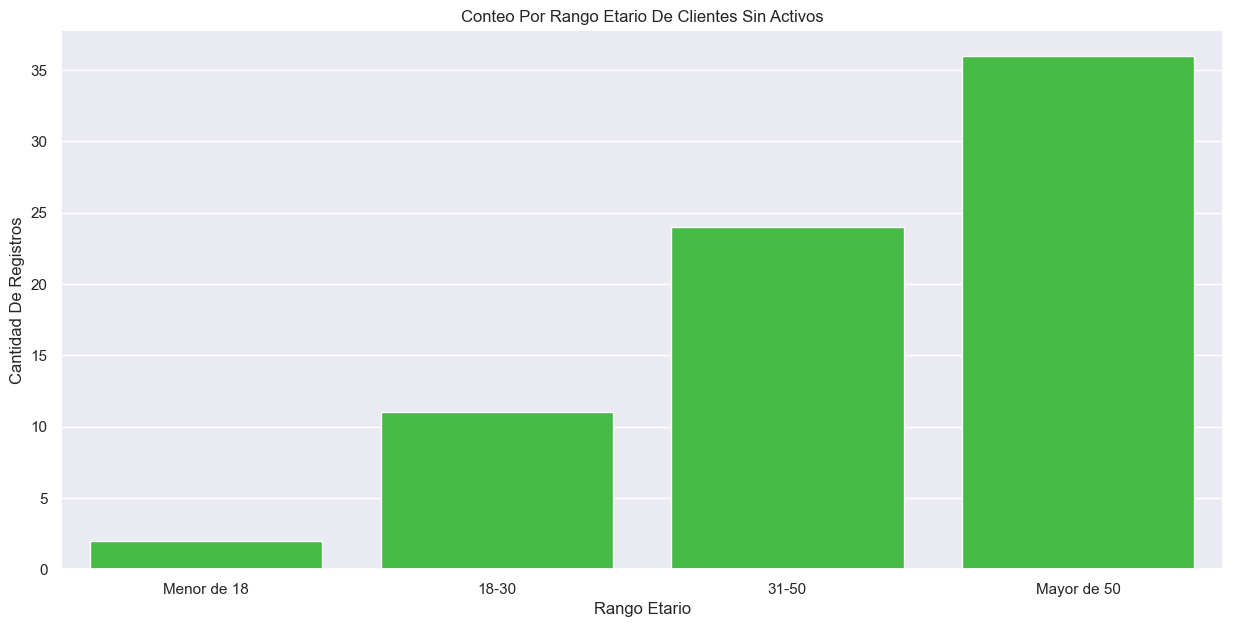

In [412]:
plt.figure(figsize = (15, 7))
sns.barplot(x = "RangoEtario", y = "Cantidad_Registros", data = rangoeta_sinact_df, color = "limegreen")
plt.xlabel("Rango Etario")
plt.ylabel("Cantidad De Registros")
plt.title("Conteo Por Rango Etario De Clientes Sin Activos")
plt.show()

### Se puede concluir que la mayoría de clientes sin activos son empleados o tienen otra ocupación y además son mayores de 50 años

### Veamos cuantas personas hay sin activos y sin ingresos

In [413]:
common_ids = sin_activos[sin_activos["Id"].isin(sin_ingresos["Id"])]["Id"]
print(f"Hay {common_ids.count()} clientes sin activos y sin ingresos financieros")

Hay 13 clientes sin activos y sin ingresos financieros


*Este dato es útil\**

### Prosigamos igual con los pasivos

In [414]:
pasivos_min = data_clientes["Pasivos"].min()
pasivos_max = data_clientes["Pasivos"].max()
print(f"El rango de pasivos va desde {pasivos_min} hasta {pasivos_max}")

El rango de pasivos va desde -4500000.0 hasta 891020085353000.0


### Sabemos que no pueden haber pasivos negativos, analizemos estos valores

In [415]:
data_clientes[data_clientes["Pasivos"] < 0]

,Id,TipoID,Ocupacion,Nacimiento,Edad,RangoEtario,Estado,IngresosFinancieros,Activos,Pasivos,Patrimonio,NivelRiesgo,Segmento,RiesgoOcupacion
748,1703,CC,Empleado,1957-12-19,65,Mayor de 50,Activo,463260000,3024851000,"-2,300,000.00","2,622,709,000.00",Medio,Personal,2
829,2022,CC,Empleado,1955-10-15,67,Mayor de 50,Activo,275750000,915927000,"-4,500,000.00","405,627,000.00",Bajo,Personal,2


### Se debe verificar si esta información es errónea, sin embargo, no será utilizada en este análisis

In [416]:
data_clientes = data_clientes.drop(data_clientes.loc[data_clientes["Pasivos"] < 0].index)
nuevo_pasivos_min = data_clientes["Pasivos"].min()
nuevo_pasivos_max = data_clientes["Pasivos"].max()
print(f"El nuevo rango de pasivos va desde {nuevo_pasivos_min} hasta {nuevo_pasivos_max}")
print(f"Ahora la tabla cliente tiene {data_clientes.shape[0]} registros")

El nuevo rango de pasivos va desde 0.0 hasta 891020085353000.0
Ahora la tabla cliente tiene 8205 registros


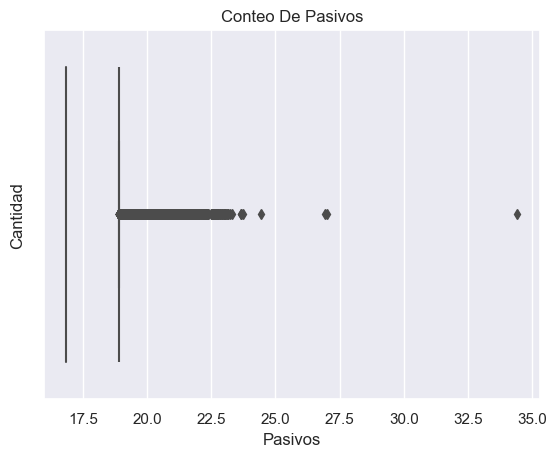

In [417]:
# Al ser valores tan grandes, normalizemos para una mejor visualización
# Se usará una transformación logarítmica
pasivos_escalados = np.log(data_clientes["Pasivos"])
sns.boxplot(x = pasivos_escalados, color = "limegreen")
plt.xlabel("Pasivos")
plt.ylabel("Cantidad")
plt.title("Conteo De Pasivos")
plt.show()

### Analizemos el sesgo de los pasivos

In [418]:
df_pasivos = pd.DataFrame(data_clientes["Pasivos"])
df_pasivos.sort_values(by = "Pasivos", ascending = False).head(10)

,Pasivos
4124,"891,020,085,353,000.00"
3846,"542,695,340,000.00"
6837,"501,507,840,000.00"
2069,"40,905,445,000.00"
7478,"20,511,263,000.00"
3207,"18,546,366,000.00"
6121,"18,420,000,000.00"
3865,"13,145,555,000.00"
8232,"12,173,250,000.00"
7468,"11,466,555,000.00"


### Veamos los valores más altos

In [419]:
mayores_pasivos = df_pasivos["Pasivos"].nlargest(4).tolist()
data_clientes[data_clientes["Pasivos"].isin(mayores_pasivos)]

,Id,TipoID,Ocupacion,Nacimiento,Edad,RangoEtario,Estado,IngresosFinancieros,Activos,Pasivos,Patrimonio,NivelRiesgo,Segmento,RiesgoOcupacion
2069,5944,CC,Empleado,1966-05-07,57,Mayor de 50,Activo,409695000,42196942000,"40,905,445,000.00","1,291,497,000.00",Bajo,Personal,2
3846,1585,CC,Independiente,1951-10-13,71,Mayor de 50,Activo,170163430000,1072668840000,"542,695,340,000.00","529,973,500,000.00",Medio,Personal,5
4124,3717,CC,Independiente,1946-07-26,76,Mayor de 50,Activo,749266000,11841683000,"891,020,085,353,000.00","12,439,553,000.00",Medio,Personal,5
6837,1764,CC,Rentista de Capital,1955-08-29,67,Mayor de 50,Activo,412031772000,1163656697000,"501,507,840,000.00","662,148,857,000.00",Medio,Personal,3


### Todos los registros parecen correctos, excepto el del cliente con ID 3717. Es muy probable que el valor del pasivo sea un error, además, no concuerda con el cálculo del patrimonio. Al igual que antes, se descartará pero deberá ser verificado

In [420]:
data_clientes = data_clientes.drop(data_clientes.loc[data_clientes["Id"] == 3717].index)
nuevo_pasivos_min_2 = data_clientes["Pasivos"].min()
nuevo_pasivos_max_2 = data_clientes["Pasivos"].max()
print(f"El nuevo rango de pasivos va desde {nuevo_pasivos_min_2} hasta {nuevo_pasivos_max_2}")
print(f"Ahora la tabla cliente tiene {data_clientes.shape[0]} registros")

El nuevo rango de pasivos va desde 0.0 hasta 542695340000.0
Ahora la tabla cliente tiene 8204 registros


### Veamos cuantos clientes no tienen pasivos

In [421]:
sin_pasivos = data_clientes[data_clientes["Pasivos"] == 0]
print(f"Hay {sin_pasivos.shape[0]} clientes sin pasivos")

Hay 2160 clientes sin pasivos


*También es un dato útil\**

### Como se mencionó anteriormente, la variable Patrimonio no será utilizada en el modelo de Machine Learning

### Por útlimo guardemos el dataframe restante en un nuevo archivo (csv)

In [422]:
data_clientes.to_csv("tabla_clientes_limpia.csv", index = False)

## **Pasemos a analizar la tabla de transacciones**

In [423]:
data_transacciones.head()

,Id,TipoID,Portafolio_RentaFija,Portafolio_RentaVariable,Entradas_Transaccionales,Entradas_Frecuencia,Salidas_Transaccionales,Salidas_Frecuencia,DivisasCompras,DivisasVentas
0,2,CC,0.00,0.00,0.00,0,"377,709,184.37",1,0.00,0.00
1,3,CC,0.00,0.00,0.00,0,"7,881,243.74",1,0.00,"12,308,274.90"
2,4,CC,"497,685,880.00",0.00,0.00,0,"20,443,213.00",2,"291,294,480.00",0.00
3,5,CC,0.00,"46,273,850.00",0.00,0,"52,083.00",1,0.00,0.00
4,8,CC,0.00,"896,284,600.00",0.00,0,"33,180,583.60",1,0.00,0.00


In [424]:
data_transacciones.tail()

,Id,TipoID,Portafolio_RentaFija,Portafolio_RentaVariable,Entradas_Transaccionales,Entradas_Frecuencia,Salidas_Transaccionales,Salidas_Frecuencia,DivisasCompras,DivisasVentas
8492,8099,CC,0.00,0.00,"601,378.93",1,"30,596,100.00",1,0.00,0.00
8493,8100,TI,0.00,0.00,0.00,1,"5,207,236.60",1,0.00,0.00
8494,8120,TI,0.00,"23,500,000.00",0.00,1,"13,000,000.00",1,0.00,0.00
8495,8178,CC,0.00,0.00,"61,967,943.85",1,"8,400,000.00",1,0.00,0.00
8496,8230,TI,0.00,0.00,"5,000,000.00",1,"90,042,745.30",1,0.00,0.00


In [425]:
print(f"La tabla de transacciones contiene {data_transacciones.shape[0]} registros y {data_transacciones.shape[1]} variables")

La tabla de transacciones contiene 8497 registros y 10 variables


In [426]:
data_transacciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8497 entries, 0 to 8496
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        8497 non-null   int64  
 1   TipoID                    8497 non-null   object 
 2   Portafolio_RentaFija      8497 non-null   float64
 3   Portafolio_RentaVariable  8497 non-null   float64
 4   Entradas_Transaccionales  8497 non-null   float64
 5   Entradas_Frecuencia       8497 non-null   int64  
 6   Salidas_Transaccionales   8497 non-null   float64
 7   Salidas_Frecuencia        8497 non-null   int64  
 8   DivisasCompras            8497 non-null   float64
 9   DivisasVentas             8497 non-null   float64
dtypes: float64(6), int64(3), object(1)
memory usage: 664.0+ KB


### El tipo de los datos es correcto, también podemos notar que no hay valores nulos

### A continuación, un diccionario resumiendo la descripción de las variables:
- Portafolio_RentaFija: Esta variable hace referencia a la parte de la cartera de inversiones o activos financieros que está compuesta por instrumentos de renta fija. Los instrumentos de renta fija son aquellos en los que se conoce de antemano el flujo de ingresos que generarán, como bonos, pagarés o certificados de depósito. 

- Portafolio_RentaVariable: En contraste con la variable anterior, esta se refiere a la parte de la cartera de inversiones o activos financieros que está compuesta por instrumentos de renta variable. Los instrumentos de renta variable son aquellos en los que los ingresos generados no están fijos y pueden variar según el desempeño de los activos subyacentes, como acciones de empresas. 

- Entradas_Transaccionales: Esta variable representa las entradas de dinero o ingresos que se generan a través de transacciones financieras. Puede incluir, por ejemplo, pagos recibidos por la venta de un activo, intereses o dividendos obtenidos de inversiones, entre otros ingresos generados por transacciones financieras.

- Entradas_Frecuencia: Esta variable indica la frecuencia con la que se reciben las entradas transaccionales. Puede ser diaria, semanal, mensual o en otro intervalo de tiempo determinado. 

- Salidas_Transaccionales: Esta variable representa las salidas de dinero o egresos que se generan a través de transacciones financieras. Puede incluir, por ejemplo, pagos realizados por la compra de activos, pago de deudas, comisiones o gastos relacionados con las transacciones financieras.

- Salidas_Frecuencia: Al igual que la variable Entradas_Frecuencia, esta variable indica la frecuencia con la que se realizan las salidas transaccionales. 

- DivisasCompras: Esta variable se refiere a las compras de divisas extranjeras realizadas en transacciones financieras. 

- DivisasVentas: En contraste con la variable anterior, esta variable indica las ventas de divisas extranjeras realizadas en transacciones financieras. 

### Ahora busquemos registros duplicados

In [427]:
duplicados_trans = data_transacciones.duplicated().sum() 
porcentaje_duplicados_trans = (duplicados_trans * 100) / len(data_transacciones)
print(f"Hay {duplicados_trans} registros duplicados\nEquivale al {round(porcentaje_duplicados_trans, 2)}% de los datos")

Hay 16 registros duplicados
Equivale al 0.19% de los datos


### Al ser tan pocos duplicados, se procede a eliminar los registros

In [428]:
data_transacciones.drop_duplicates(inplace = True)
cant_datos_trans = len(data_transacciones)
print(f"La tabla de transacciones ahora cuenta con {cant_datos_trans} registros")

La tabla de transacciones ahora cuenta con 8481 registros


### Veamos un resumen estadístico de las transacciones

In [429]:
num_vars_trans = ["Portafolio_RentaFija", "Portafolio_RentaVariable", "Entradas_Transaccionales", "Entradas_Frecuencia", "Salidas_Transaccionales", "Salidas_Frecuencia", "DivisasCompras", "DivisasVentas"]
stats_trans = data_transacciones[num_vars_trans].describe().round(2)
pd.set_option('display.float_format', '{:,.2f}'.format)
stats_trans.T

,count,mean,std,min,25%,50%,75%,max
Portafolio_RentaFija,"8,481.00","132,270,844.59","5,094,228,930.37",0.00,0.00,0.00,0.00,"466,981,192,200.00"
Portafolio_RentaVariable,"8,481.00","128,959,115.21","2,183,492,924.40",0.00,0.00,0.00,"30,009,500.00","117,366,174,532.76"
Entradas_Transaccionales,"8,481.00","60,431,305.91","482,048,058.02",0.00,0.00,0.00,"18,177,142.86","32,000,000,000.00"
Entradas_Frecuencia,"8,481.00",0.11,0.89,0.00,0.00,0.00,0.00,43.00
Salidas_Transaccionales,"8,481.00","61,873,944.56","305,503,389.08",0.00,"2,650,000.00","13,893,734.40","48,978,800.62","15,864,072,291.72"
Salidas_Frecuencia,"8,481.00",1.40,1.60,0.00,1.00,1.00,2.00,88.00
DivisasCompras,"8,481.00","43,702,072.30","322,514,316.69",0.00,0.00,0.00,0.00,"19,606,000,000.00"
DivisasVentas,"8,481.00","14,396,354.17","131,209,285.05",0.00,0.00,0.00,0.00,"5,647,500,000.00"


### Matriz de correlación

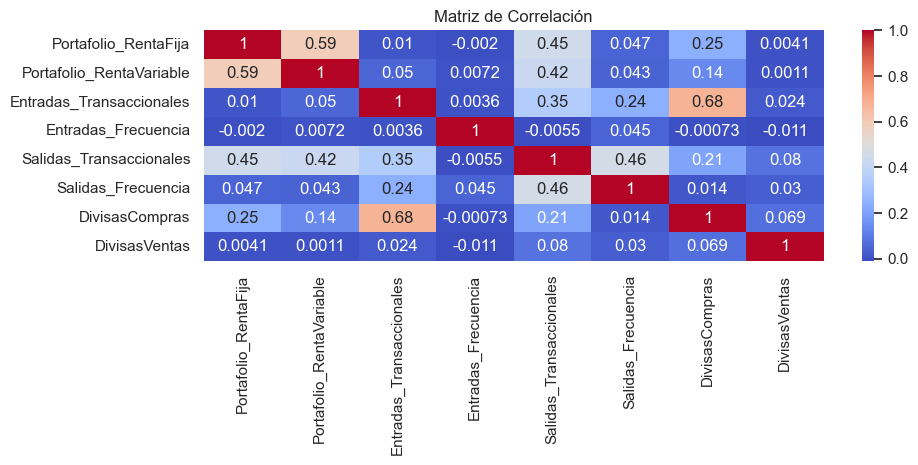

In [430]:
plt.figure(figsize = (10, 3))
correlation_matrix_trans = data_transacciones[num_vars_trans].corr()
sns.heatmap(correlation_matrix_trans, annot = True, cmap = "coolwarm")
plt.title("Matriz de Correlación")
plt.show()

### Se pueden observar dos correlaciones altas:
- Entradas_Transaccionales / DivisasCompras: Esta correlación puede indicar que un aumento en las transacciones y los ingresos financieros de una persona o empresa puede estar relacionado con un mayor interés o necesidad de adquirir divisas extranjeras para actividades como viajes internacionales, importaciones o inversiones en el extranjero

- Portafolio_RentaFija / Portafolio_RentaVariable: Esta correlación sugiere que existe una relación positiva moderada entre los rendimientos o cambios en ambos tipos de activos. Esto podría significar que cuando los activos de renta fija tienen buenos rendimientos, es probable que los activos de renta variable también experimenten rendimientos favorables, y viceversa

### Sin embargo, no parecen ser casos de multicolinealidad

### Verifiquemos que no haya ningún ID repetido

In [431]:
cant_id_trans = data_transacciones["Id"].value_counts().max()
print(f"La mayor cantidad de veces que se repite un ID es: {cant_id_trans}")

La mayor cantidad de veces que se repite un ID es: 2


### Analizemos los IDs duplicados

In [432]:
ids_duplicados_trans = pd.DataFrame(data_transacciones["Id"].value_counts()).reset_index()
ids_duplicados_trans.columns = ["Id", "Cantidad_Registros"]
ids_duplicados_trans = ids_duplicados_trans[ids_duplicados_trans["Cantidad_Registros"] > 1]
print(f"Hay {ids_duplicados_trans.shape[0]} IDs duplicados")

Hay 7 IDs duplicados


In [433]:
lista_ids_duplicados_trans = ids_duplicados_trans["Id"].tolist()
data_transacciones[data_transacciones["Id"].isin(lista_ids_duplicados_trans)].sort_values(by = "Id")

,Id,TipoID,Portafolio_RentaFija,Portafolio_RentaVariable,Entradas_Transaccionales,Entradas_Frecuencia,Salidas_Transaccionales,Salidas_Frecuencia,DivisasCompras,DivisasVentas
8452,8093,TI,0.00,0.00,"5,000,000.00",1,"8,973,132.84",1,0.00,0.00
8490,8093,TI,0.00,0.00,"40,000,003.00",1,"50,000,000.00",1,0.00,0.00
8313,8096,RC,0.00,0.00,"1,400,000.00",0,0.00,0,0.00,0.00
8491,8096,TI,0.00,0.00,"25,000,000.00",1,"8,973,132.84",1,0.00,0.00
8314,8099,RC,0.00,0.00,"402,964.17",0,0.00,0,0.00,0.00
8492,8099,CC,0.00,0.00,"601,378.93",1,"30,596,100.00",1,0.00,0.00
8454,8100,TI,"200,348,000.00",0.00,"100,000,000.00",0,0.00,0,0.00,0.00
8493,8100,TI,0.00,0.00,0.00,1,"5,207,236.60",1,0.00,0.00
7782,8120,CC,0.00,0.00,0.00,0,"508,881.10",2,0.00,0.00
8494,8120,TI,0.00,"23,500,000.00",0.00,1,"13,000,000.00",1,0.00,0.00


### Hay discrepancia en los registros con ID similar. No se tendrán en cuenta en este análisis y deberá verificarse cual es el el correcto

In [434]:
data_transacciones = data_transacciones.drop(data_transacciones.loc[data_transacciones["Id"].isin(lista_ids_duplicados_trans)].index)
print(f"Ahora la tabla de transacciones tiene {data_transacciones.shape[0]} registros")

Ahora la tabla de transacciones tiene 8467 registros


### Analicemos el tipo de ID

In [435]:
tipo_ID_trans_df = pd.DataFrame(data_transacciones["TipoID"].value_counts()).reset_index()
tipo_ID_trans_df.columns = ["TipoID", "Cantidad_Registros"]
tipo_ID_trans_df

,TipoID,Cantidad_Registros
0,CC,8091
1,TI,148
2,RC,101
3,CE,97
4,PP,24
5,OT,3
6,C,2
7,T,1


### Vemos que hay algunos valores erróneos, analizemos

In [436]:
tipo_id_error = ["C", "T"]
data_transacciones[data_transacciones["TipoID"].isin(tipo_id_error)]

,Id,TipoID,Portafolio_RentaFija,Portafolio_RentaVariable,Entradas_Transaccionales,Entradas_Frecuencia,Salidas_Transaccionales,Salidas_Frecuencia,DivisasCompras,DivisasVentas
216,317,C,0.00,"88,308,300.00",0.00,0,"5,239,124.63",1,0.00,0.00
410,517,C,0.00,0.00,0.00,0,"1,203,537.95",1,0.00,0.00
1440,1551,T,0.00,0.00,0.00,0,"81,211,108.73",2,0.00,0.00


### De estos valores erróneos no es posible concluir a simple vista si "C" se refiere a "CC", "RC" o a "CE". O si "T" se refiere a "TI" o a "OT". Por ende, los registros no se tendrán en cuenta y hay que consultar cual es el correcto

In [437]:
data_transacciones = data_transacciones.drop(data_transacciones.loc[data_transacciones["TipoID"].isin(tipo_id_error)].index)
print(f"Ahora la tabla de transacciones tiene {data_transacciones.shape[0]} registros")

Ahora la tabla de transacciones tiene 8464 registros


### Comenzemos analizando el portafolio de renta fija

In [438]:
rentfija_min = data_transacciones["Portafolio_RentaFija"].min()
rentfija_max = data_transacciones["Portafolio_RentaFija"].max()
print(f"El rango del portafolio de renta fija va desde {rentfija_min} hasta {rentfija_max}")

El rango del portafolio de renta fija va desde 0.0 hasta 466981192200.0


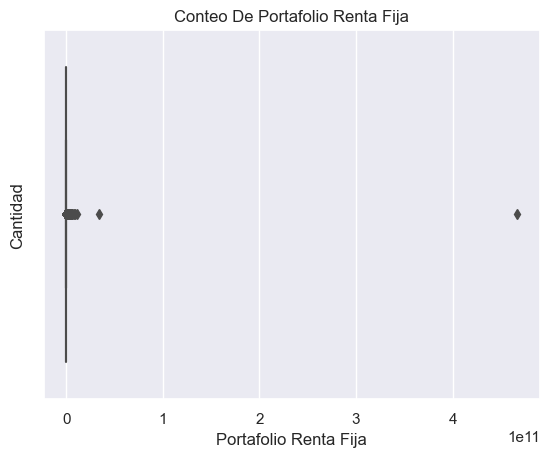

In [439]:
sns.boxplot(x = data_transacciones["Portafolio_RentaFija"], color = "limegreen")
plt.xlabel("Portafolio Renta Fija")
plt.ylabel("Cantidad")
plt.title("Conteo De Portafolio Renta Fija")
plt.show()

### Analizemos estos valores atípicos

In [440]:
df_rentifja = pd.DataFrame(data_transacciones["Portafolio_RentaFija"])
df_rentifja.sort_values(by = "Portafolio_RentaFija", ascending = False).head(10)

,Portafolio_RentaFija
79,"466,981,192,200.00"
4582,"33,572,248,600.00"
7479,"11,473,232,291.38"
7512,"9,327,522,400.00"
30,"7,884,350,000.00"
415,"6,361,591,384.96"
113,"6,133,001,162.16"
1245,"5,941,165,000.00"
430,"5,853,312,200.00"
4603,"5,387,597,500.00"


### Veamos los registros de los valores más altos

In [441]:
mayores_rentfija = df_rentifja["Portafolio_RentaFija"].nlargest(4).tolist()
data_transacciones[data_transacciones["Portafolio_RentaFija"].isin(mayores_rentfija)]

,Id,TipoID,Portafolio_RentaFija,Portafolio_RentaVariable,Entradas_Transaccionales,Entradas_Frecuencia,Salidas_Transaccionales,Salidas_Frecuencia,DivisasCompras,DivisasVentas
79,177,CC,"466,981,192,200.00","114,496,027,410.00",0.00,0,"12,235,418,396.09",8,"7,116,372,222.22",0.00
4582,4698,CC,"33,572,248,600.00","60,888,335,800.00",0.00,0,"2,002,438,759.47",2,0.00,0.00
7479,7714,CC,"11,473,232,291.38","578,014,740.00",0.00,0,"1,375,518,496.28",2,0.00,0.00
7512,7747,CC,"9,327,522,400.00","144,248,920.00",0.00,0,"1,831,453,042.43",1,0.00,0.00


### A pesar de que hay valores muy altos, no parecen erróneos

### Sigamos con el portfolio de renta variable

In [442]:
rentvar_min = data_transacciones["Portafolio_RentaVariable"].min()
rentvar_max = data_transacciones["Portafolio_RentaVariable"].max()
print(f"El rango del portafolio de renta variable va desde {rentvar_min} hasta {rentvar_max}")

El rango del portafolio de renta variable va desde 0.0 hasta 117366174532.76


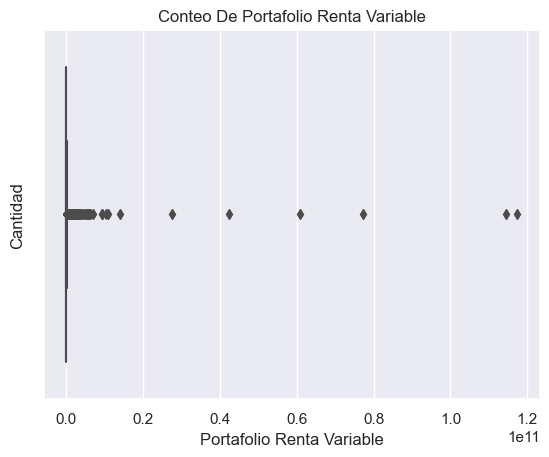

In [443]:
sns.boxplot(x = data_transacciones["Portafolio_RentaVariable"], color = "limegreen")
plt.xlabel("Portafolio Renta Variable")
plt.ylabel("Cantidad")
plt.title("Conteo De Portafolio Renta Variable")
plt.show()

### Al igual que con la renta fija, analizemos los valores atípicos

In [444]:
df_rentvar = pd.DataFrame(data_transacciones["Portafolio_RentaVariable"])
df_rentvar.sort_values(by = "Portafolio_RentaVariable", ascending = False).head(10)

,Portafolio_RentaVariable
1653,"117,366,174,532.76"
79,"114,496,027,410.00"
4199,"77,228,917,811.58"
4582,"60,888,335,800.00"
1310,"42,391,495,445.35"
2223,"27,615,357,645.00"
1137,"13,852,848,664.02"
6182,"10,955,863,420.00"
493,"10,419,629,388.00"
71,"9,390,473,460.00"


### Estos valores se ven parejos, pasemos a analizar las entradas transaccionales

In [445]:
entradastrans_min = data_transacciones["Entradas_Transaccionales"].min()
entradastrans_max = data_transacciones["Entradas_Transaccionales"].max()
print(f"El rango de las entradas transaccionales va desde {entradastrans_min} hasta {entradastrans_max}")

El rango de las entradas transaccionales va desde 0.0 hasta 32000000000.0


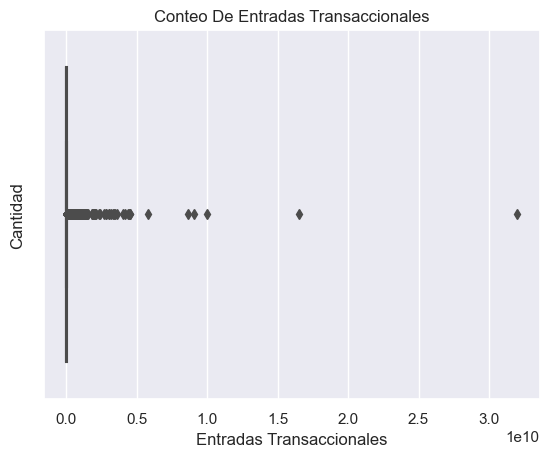

In [446]:
sns.boxplot(x = data_transacciones["Entradas_Transaccionales"], color = "limegreen")
plt.xlabel("Entradas Transaccionales")
plt.ylabel("Cantidad")
plt.title("Conteo De Entradas Transaccionales")
plt.show()

### Veamos los valores atípicos

In [447]:
df_entrans = pd.DataFrame(data_transacciones["Entradas_Transaccionales"])
df_entrans.sort_values(by = "Entradas_Transaccionales", ascending = False).head(10)

,Entradas_Transaccionales
2745,"32,000,000,000.00"
1474,"16,530,206,439.90"
1101,"10,000,000,000.00"
5062,"9,092,108,324.70"
3525,"8,638,504,371.00"
752,"5,772,500,000.00"
3669,"4,507,938,352.00"
5588,"4,500,000,000.00"
8166,"4,450,000,000.00"
5988,"4,376,802,413.01"


### Estos valores también se ven parejos

### Veamos la relación del valor de las entradas con su frecuencia

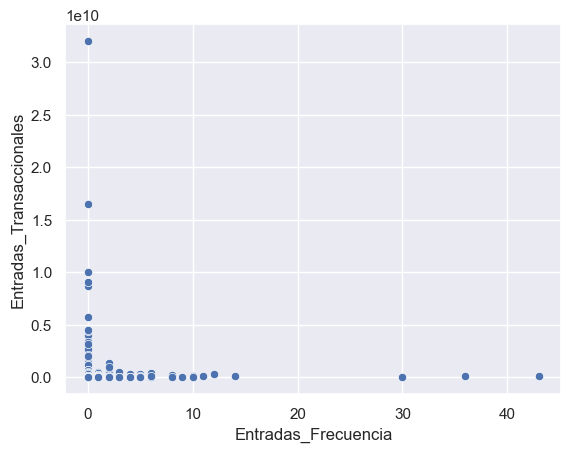

In [448]:
sns.scatterplot(data = data_transacciones, x = "Entradas_Frecuencia", y = "Entradas_Transaccionales")
plt.show()

### Analizemos la frecuencia de las entradas

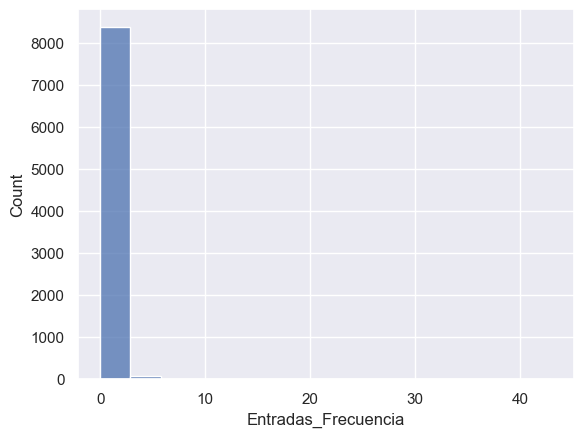

In [449]:
sns.histplot(data = data_transacciones, x = "Entradas_Frecuencia")
plt.show()

In [450]:
df_entfrac = pd.DataFrame(data_transacciones["Entradas_Frecuencia"].value_counts()).reset_index()
df_entfrac.columns = ["Entradas_Frecuencia", "Cantidad_Registros"]
df_entfrac

,Entradas_Frecuencia,Cantidad_Registros
0,0,8007
1,1,272
2,2,102
3,3,38
4,4,19
5,5,11
6,6,3
7,8,2
8,10,2
9,11,2


*Aquí se presenta un caso peculiar que analizaremos más adelante\**

### Continuemos analizando las salidas transaccionales

In [451]:
salidastrans_min = data_transacciones["Salidas_Transaccionales"].min()
salidastrans_max = data_transacciones["Salidas_Transaccionales"].max()
print(f"El rango de las salidas transaccionales va desde {salidastrans_min} hasta {salidastrans_max}")

El rango de las salidas transaccionales va desde 0.0 hasta 15864072291.715


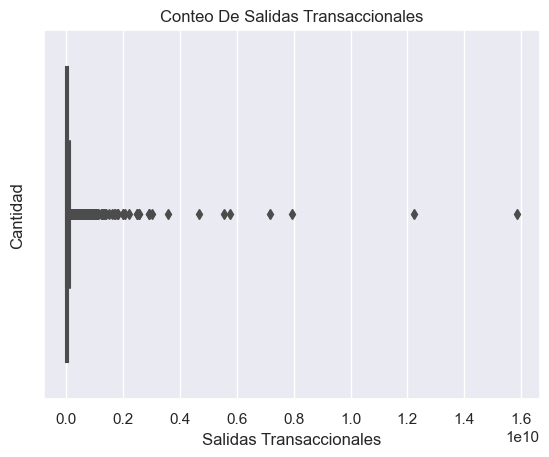

In [452]:
sns.boxplot(x = data_transacciones["Salidas_Transaccionales"], color = "limegreen")
plt.xlabel("Salidas Transaccionales")
plt.ylabel("Cantidad")
plt.title("Conteo De Salidas Transaccionales")
plt.show()

In [453]:
df_salidastrans = pd.DataFrame(data_transacciones["Salidas_Transaccionales"])
df_salidastrans.sort_values(by = "Salidas_Transaccionales", ascending = False).head(10)

,Salidas_Transaccionales
1474,"15,864,072,291.72"
79,"12,235,418,396.09"
30,"7,925,000,000.00"
1653,"7,165,972,041.02"
4578,"5,745,309,001.74"
5988,"5,546,465,044.93"
6773,"4,671,970,745.34"
5503,"3,571,557,697.12"
2644,"3,003,977,431.50"
1750,"2,918,632,532.40"


### Estos valores se ven parejos, veamos la relación con su frecuencia

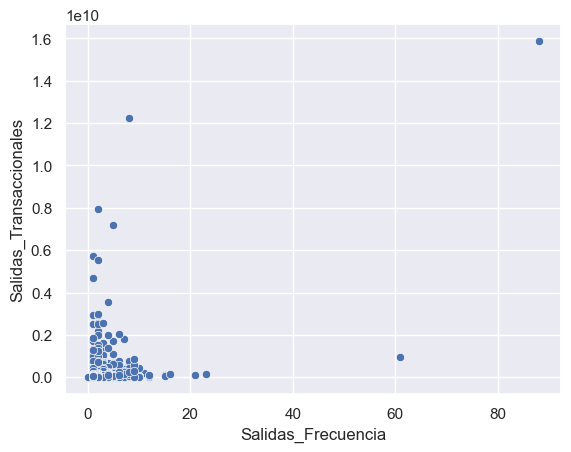

In [454]:
sns.scatterplot(data = data_transacciones, x = "Salidas_Frecuencia", y = "Salidas_Transaccionales")
plt.show()

### Frecuencia de las salidas

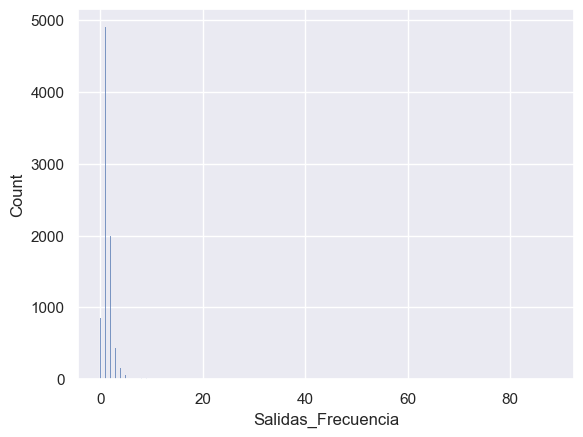

In [455]:
sns.histplot(data = data_transacciones, x = "Salidas_Frecuencia")
plt.show()

In [456]:
df_salidasfrac = pd.DataFrame(data_transacciones["Salidas_Frecuencia"].value_counts()).reset_index()
df_salidasfrac.columns = ["Salidas_Frecuencia", "Cantidad_Registros"]
df_salidasfrac

,Salidas_Frecuencia,Cantidad_Registros
0,1,4907
1,2,1988
2,0,847
3,3,430
4,4,151
5,5,58
6,6,24
7,7,19
8,8,14
9,9,10


### Veamos el caso peculiar que se menciona anteriormente:

### Para verificar la consistencia de las entradas y salidas de transacciones con sus frecuencias correspondientes debemos validar las siguientes hipótesis:
- a) Salidas != 0 ->  Frecuencia != 0 (Si hay salidas, hay frecuencia)
- b) Salidas == 0 ->  Frecuencia == 0 (Si no hay salidas, no hay frecuencia)
- c) Entradas != 0 ->  Frecuencia != 0 (Si hay entradas, hay frecuencia)
- d) Entradas == 0 ->  Frecuencia == 0 (Si no hay entradas, no hay frecuencia)

### Validemos

In [457]:
a = data_transacciones[data_transacciones["Salidas_Transaccionales"] != 0]
df_a = pd.DataFrame(a["Salidas_Frecuencia"].value_counts()).reset_index()
df_a.columns = ["Salidas_Frecuencia", "Cantidad_Registros"]
if 0 in df_a["Salidas_Frecuencia"].values.tolist():
    print("No se cumple la hipóstesis a")
else: print("Se cumple la hipóstesis a")

Se cumple la hipóstesis a


In [458]:
b = data_transacciones[data_transacciones["Salidas_Transaccionales"] == 0]
df_b = pd.DataFrame(b["Salidas_Frecuencia"].value_counts()).reset_index()
df_b.columns = ["Salidas_Frecuencia", "Cantidad_Registros"]
if 0 not in df_b["Salidas_Frecuencia"].values.tolist():
    print("No se cumple la hipóstesis b")
else: print("Se cumple la hipóstesis b")

Se cumple la hipóstesis b


In [459]:
c = data_transacciones[data_transacciones["Entradas_Transaccionales"] != 0]
df_c = pd.DataFrame(c["Entradas_Frecuencia"].value_counts()).reset_index()
df_c.columns = ["Entradas_Transaccionales", "Cantidad_Registros"]
if 0 in df_c["Entradas_Transaccionales"].values.tolist():
    print("No se cumple la hipóstesis c")
else: print("Se cumple la hipóstesis c")

No se cumple la hipóstesis c


In [460]:
d = data_transacciones[data_transacciones["Entradas_Transaccionales"] == 0]
df_d = pd.DataFrame(d["Entradas_Transaccionales"].value_counts()).reset_index()
df_d.columns = ["Entradas_Transaccionales", "Cantidad_Registros"]
if 0 not in df_d["Entradas_Transaccionales"].values.tolist():
    print("No se cumple la hipóstesis d")
else: print("Se cumple la hipóstesis d")

Se cumple la hipóstesis d


### Luego de la prueba se puede concluir que todas las hipótesis se cumplen a execepción de la c, esto quiere decir que hay entradas transaccionales que no tienen ninguna frecuencia, ej: Entran 20 dólares cada nunca. 
### Claramente estos datos causan un poco de ambiguedad y estas conclusiones son mi punto de vista, para evitar sesgos, se descartarán las variables de frecuencias en el modelo de segmentación y se deberá consultar con el proveedor de los datos para aclarar esta situación

### Finalizemos analizando las variables de divisas

## DivisasCompras

In [461]:
divisascompras_min = data_transacciones["DivisasCompras"].min()
divisascompras_max = data_transacciones["DivisasCompras"].max()
print(f"El rango de la compra de divisas va desde {divisascompras_min} hasta {divisascompras_max}")

El rango de la compra de divisas va desde 0.0 hasta 19606000000.0


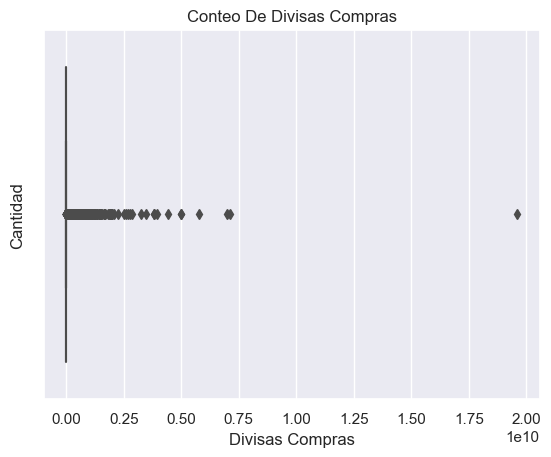

In [462]:
sns.boxplot(x = data_transacciones["DivisasCompras"], color = "limegreen")
plt.xlabel("Divisas Compras")
plt.ylabel("Cantidad")
plt.title("Conteo De Divisas Compras")
plt.show()

### Veamos los valores atípicos

In [463]:
df_divisascompras = pd.DataFrame(data_transacciones["DivisasCompras"])
df_divisascompras.sort_values(by = "DivisasCompras", ascending = False).head(10)

,DivisasCompras
2745,"19,606,000,000.00"
79,"7,116,372,222.22"
5376,"6,999,999,970.04"
752,"5,772,261,500.00"
1101,"5,003,000,013.20"
4553,"4,984,158,358.26"
5988,"4,409,911,387.23"
2179,"3,960,000,001.28"
8166,"3,819,530,000.00"
4628,"3,805,000,000.00"


### La compra de divisas más alta es el doble de la segunda compra de divisas más alta, analizemos a este cliente

In [464]:
data_transacciones[data_transacciones["DivisasCompras"] == df_divisascompras.max().sum()]

,Id,TipoID,Portafolio_RentaFija,Portafolio_RentaVariable,Entradas_Transaccionales,Entradas_Frecuencia,Salidas_Transaccionales,Salidas_Frecuencia,DivisasCompras,DivisasVentas
2745,2858,CC,"2,608,625,159.48",0.00,"32,000,000,000.00",0,"107,500,000.00",2,"19,606,000,000.00",0.00


### Este cliente tiene un portafolio de renta fija  y entradas transaccionales altas, no parece ser un registro erróneo. Analizemos la venta de divisas

In [465]:
divisasventas_min = data_transacciones["DivisasVentas"].min()
divisasventas_max = data_transacciones["DivisasVentas"].max()
print(f"El rango de la venta de divisas va desde {divisasventas_min} hasta {divisasventas_max}")

El rango de la venta de divisas va desde 0.0 hasta 5647500000.0


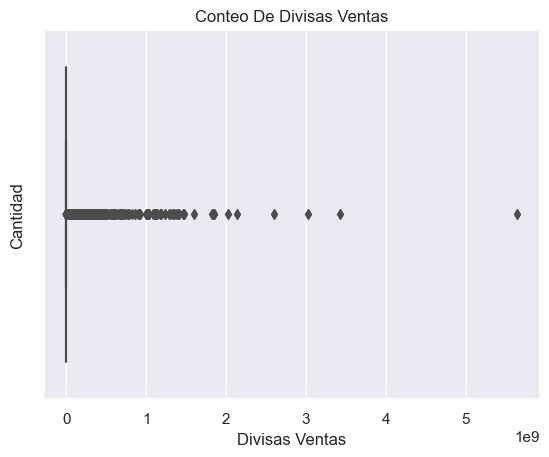

In [466]:
sns.boxplot(x = data_transacciones["DivisasVentas"], color = "limegreen")
plt.xlabel("Divisas Ventas")
plt.ylabel("Cantidad")
plt.title("Conteo De Divisas Ventas")
plt.show()

### Veamos los valores atípicos

In [467]:
df_divisasventas = pd.DataFrame(data_transacciones["DivisasVentas"])
df_divisasventas.sort_values(by = "DivisasVentas", ascending = False).head(10)

,DivisasVentas
5816,"5,647,500,000.00"
3335,"3,432,050,000.00"
431,"3,031,788,656.00"
2790,"2,606,280,060.21"
6032,"2,134,500,000.00"
5041,"2,030,130,000.00"
5974,"1,855,000,000.00"
1323,"1,849,000,000.00"
1747,"1,833,194,417.20"
3575,"1,820,277,036.69"


### Estos valores se ven parejos

### Por útlimo guardemos el dataframe restante en un nuevo archivo (csv)

In [468]:
data_transacciones.to_csv("tabla_transacciones_limpia.csv", index = False)

### **Basados en las conclusiones recolectadas en este análisis exploratorio es posible implementar un modelo de segmentación de clientes óptimo**